In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
from matplotlib.lines import Line2D
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [2]:
with open("simu3_data/simu3_design.pkl", 'rb') as inp:
    df = pickle.load(inp)
df = df.loc[df.session < 300]
df

,position,session,testidx,lag,type,study_itemno1,study_itemno2,test_itemno1,test_itemno2
0,1,0,40,0,-1,708,1244,589,984
1,2,0,91,0,-1,751,680,603,433
2,3,0,131,0,-1,823,1591,709,-1
3,4,0,2,2,0,880,1325,384,-1
4,5,0,87,0,-1,51,1505,11,735
...,...,...,...,...,...,...,...,...,...
47995,156,299,152,4,3,677,1211,890,1117
47996,157,299,153,4,3,1462,1416,890,1579
47997,158,299,156,2,2,1412,24,677,1211
47998,159,299,151,8,1,925,390,12,-1


### Run CMR-IA

In [3]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [4]:
# 0.05664990122656639 [0.08002185 0.75323811 0.72449979 0.45157166 0.6795584 0.48383503 0.78242327]
# 1.2761844774450029 [0.37161639 0.41396664 0.23823923 0.54735247 0.4963487 0.68576123 0.7445582 ]
# 0.30919848309030773 [0.49940248 0.57653294 0.09103241 0.36432852 0.47094941 0.57067348 0.7334024 ]
params = cmr.make_default_params()
params.update(
    beta_enc = 0.50,  # 0.1  /0.4
    beta_cue = 0.576,  # 0.4  /0.7
    beta_rec_post = 0.091,  # 0.1
    s_fc = 0.364,  # 0.1
    gamma_fc = 0.471,  # 0.1
    c_thresh_itm = 0.571,  # 0.22
    c_thresh_ass = 0.733,  # 0.285
    d_ass = 0,
    use_new_context = True,
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.5,
 'beta_cue': 0.576,
 'beta_rec_post': 0.091,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.364,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.5,
 'c_thresh_itm': 0.571,
 'c_thresh_ass': 0.733,
 'd_ass': 0,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.471,
 'gamma_cf': 0.5,
 'use_new_context': True}

In [5]:
# pos_b = np.arange(0,1,0.05)
# csim_old = []
# csim_new = []
# for b in pos_b:
#     # print(b)
#     params.update(beta_enc = b)
#     df_simu = cmr.run_hockley_recog_multi_sess(params,df,s_mat)
#     df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
#     old = df_simu.loc[df_simu.type == 1].csim.mean()
#     new = df_simu.loc[df_simu.type == 0].csim.mean()
#     csim_old.append(old)
#     csim_new.append(new)
# df_tmp = pd.DataFrame(data = {'b':pos_b, 'old':csim_old, 'new':csim_new})
# sns.lineplot(data=df_tmp, x='b', y='old', linewidth=2)
# sns.lineplot(data=df_tmp, x='b', y='new', linewidth=2)

In [6]:
df_simu = cmr.run_conti_recog_multi_sess(params, df, s_mat, mode="Hockley")
df_simu

100%|██████████| 300/300 [01:10<00:00,  4.23it/s]

CMR Time: 70.98024368286133


,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim
0,0,1,708,1244,589,984,0.0,4.666586,0.251153
1,0,2,751,680,603,433,0.0,1705.135132,0.546201
2,0,3,823,1591,709,-1,0.0,11.414175,0.295874
3,0,4,880,1325,384,-1,0.0,2139.039062,0.557537
4,0,5,51,1505,11,735,0.0,422.276520,0.476414
...,...,...,...,...,...,...,...,...,...
47995,299,156,677,1211,890,1117,0.0,316.566315,0.679992
47996,299,157,1462,1416,890,1579,1.0,51.198269,0.771083
47997,299,158,1412,24,677,1211,1.0,14.770555,0.833237
47998,299,159,925,390,12,-1,1.0,231.870895,0.695560


In [7]:
df_simu = df_simu.merge(df,on=['session','position','study_itemno1','study_itemno2','test_itemno1','test_itemno2'])
df_simu

,session,position,study_itemno1,study_itemno2,test_itemno1,test_itemno2,s_resp,s_rt,csim,testidx,lag,type
0,0,1,708,1244,589,984,0.0,4.666586,0.251153,40,0,-1
1,0,2,751,680,603,433,0.0,1705.135132,0.546201,91,0,-1
2,0,3,823,1591,709,-1,0.0,11.414175,0.295874,131,0,-1
3,0,4,880,1325,384,-1,0.0,2139.039062,0.557537,2,2,0
4,0,5,51,1505,11,735,0.0,422.276520,0.476414,87,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
47995,299,156,677,1211,890,1117,0.0,316.566315,0.679992,152,4,3
47996,299,157,1462,1416,890,1579,1.0,51.198269,0.771083,153,4,3
47997,299,158,1412,24,677,1211,1.0,14.770555,0.833237,156,2,2
47998,299,159,925,390,12,-1,1.0,231.870895,0.695560,151,8,1


In [8]:
df_simu.groupby(['type','lag']).csim.mean()

type  lag
-1    0      0.501647
 0    2      0.503761
      4      0.506119
      6      0.505421
      8      0.505129
      16     0.503398
 1    2      0.677130
      4      0.665548
      6      0.666878
      8      0.670213
      16     0.661525
 2    2      0.760210
      4      0.758889
      6      0.758134
      8      0.758114
      16     0.756280
 3    2      0.691514
      4      0.684553
      6      0.685627
      8      0.691879
      16     0.685091
Name: csim, dtype: float64

### PLOT

In [9]:
df_laggp = df_simu.groupby(['type','lag']).s_resp.mean().to_frame(name='yes_rate').reset_index()
df_laggp['no_rate'] = 1 - df_laggp['yes_rate'] 
df_laggp

,type,lag,yes_rate,no_rate
0,-1,0,0.207555,0.792445
1,0,2,0.301551,0.698449
2,0,4,0.325506,0.674494
3,0,6,0.313987,0.686013
4,0,8,0.309009,0.690991
5,0,16,0.306381,0.693619
6,1,2,0.951398,0.048602
7,1,4,0.925756,0.074244
8,1,6,0.919019,0.080981
9,1,8,0.920245,0.079755


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

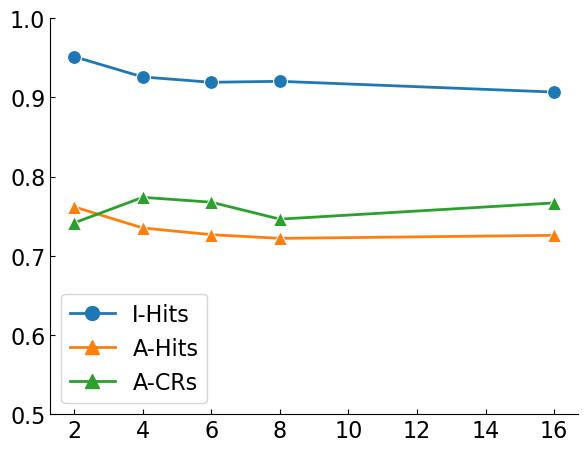

In [10]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_laggp.loc[df_laggp.type == 1], x='lag', y='yes_rate', linewidth=2, marker='o', markersize = 10, label='I-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 2], x='lag', y='yes_rate', linewidth=2, marker='^', markersize = 10, label='A-Hits')
sns.lineplot(data=df_laggp.loc[df_laggp.type == 3], x='lag', y='no_rate', linewidth=2, marker='^', markersize = 10, label='A-CRs')
plt.ylim([0.5,1])
plt.xlabel('Test Lag')
plt.ylabel('Proportion Correct')
ax.set(xlabel=None, ylabel=None)
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'I-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-Hits'),
                   Line2D([0], [0], color = sns.color_palette()[2], lw=2, marker='^', markersize = 10, linestyle='-', label = 'A-CRs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_hr.pdf')
plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

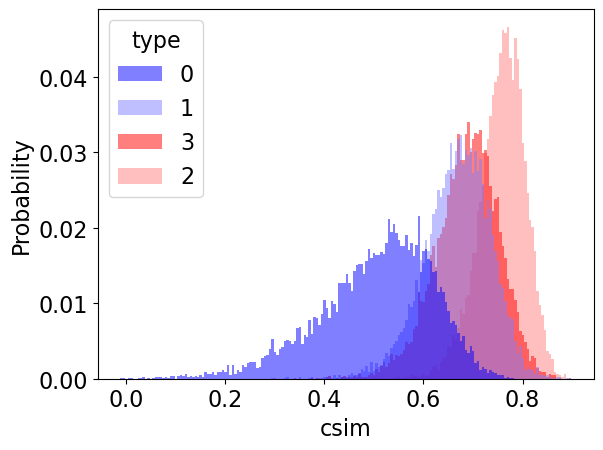

In [11]:
sns.histplot(data=df_simu, x="csim", hue = "type", hue_order = [0,1,3,2], palette = [[0,0,1],[0.5,0.5,1],[1,0,0],[1,0.5,0.5]], stat = "probability", binwidth = 0.005, common_norm=False, edgecolor = None)
# plt.savefig('fig/simu3_csim.pdf')
plt.show()

In [12]:
df_dprime = pd.DataFrame()
df_dprime['lag'] = [2,4,6,8,16]
df_dprime['I_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 1, 'yes_rate'].astype(float))
df_dprime['I_z_far'] = np.mean(sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 0, 'yes_rate'].astype(float)))
df_dprime['I_dprime'] = df_dprime['I_z_hr'] - df_dprime['I_z_far']
df_dprime['A_z_hr'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 2, 'yes_rate'].astype(float))
df_dprime['A_z_far'] = sp.stats.norm.ppf(df_laggp.loc[df_laggp.type == 3, 'yes_rate'].astype(float))
df_dprime['A_dprime'] = df_dprime['A_z_hr'] - df_dprime['A_z_far']
df_dprime

,lag,I_z_hr,I_z_far,I_dprime,A_z_hr,A_z_far,A_dprime
0,2,1.658567,-0.492336,2.150902,0.711956,-0.647864,1.359820
1,4,1.444894,-0.492336,1.937230,0.628172,-0.751286,1.379458
2,6,1.398503,-0.492336,1.890839,0.602639,-0.730974,1.333613
3,8,1.406724,-0.492336,1.899060,0.588563,-0.662579,1.251142
4,16,1.320428,-0.492336,1.812763,0.600131,-0.728075,1.328206


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

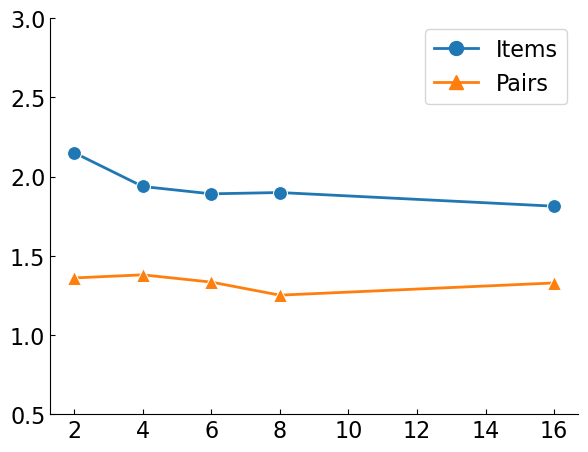

In [13]:
fig, ax = plt.subplots(figsize=(6,4.5))
fig.subplots_adjust(left=0.1, right=0.98, bottom=0.1, top=0.98)

ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_dprime, x='lag', y='I_dprime', linewidth=2, marker='o', markersize = 10, label='Items')
sns.lineplot(data=df_dprime, x='lag', y='A_dprime', linewidth=2, marker='^', markersize = 10, label='Pairs')
# plt.ylabel("$d^'$")
# plt.xlabel('Test Lag')
ax.set(xlabel=None, ylabel=None)
plt.ylim([0.5,3])
plt.xticks(ticks=np.arange(2,18,2))
# plt.tick_params(labelleft=False)
legend_elements = [Line2D([0], [0], color = sns.color_palette()[0], lw=2, marker='o', markersize = 10, linestyle='-',label = 'Items'),
                   Line2D([0], [0], color = sns.color_palette()[1], lw=2, marker='^', markersize = 10, linestyle='-', label = 'Pairs')]
plt.legend(handles = legend_elements)

# plt.savefig('simu3_fig/simu3_dprime.pdf')
plt.show()

In [14]:
# get the vectors
I_hr = df_laggp.loc[df_laggp.type == 1, "yes_rate"].to_numpy()
A_hr = df_laggp.loc[df_laggp.type == 2, "yes_rate"].to_numpy()
I_dprime = df_dprime['I_dprime'].to_numpy()
A_dprime = df_dprime['A_dprime'].to_numpy()
# cut off I_dprime and A_dprime above 5 or below -5 to avoid inf
I_dprime = np.clip(I_dprime, -5, 5)
A_dprime = np.clip(A_dprime, -5, 5)

# ground truth
I_hr_gt = np.array([0.865, 0.811, 0.752, 0.746, 0.708])
A_hr_gt = np.array([0.843, 0.787, 0.720, 0.735, 0.646])
I_dprime_gt = np.array([2.31, 2.05, 1.85, 1.84, 1.68])
A_dprime_gt = np.array([1.36, 1.29, 1.37, 1.58, 1.39])

# calculate the error
err = np.mean(np.power(I_hr - I_hr_gt,2)) * 10 + np.mean(np.power(A_hr - A_hr_gt,2)) * 10 \
    + np.mean(np.power(I_dprime - I_dprime_gt,2)) + np.mean(np.power(A_dprime - A_dprime_gt,2))
err

0.3048898985590392

In [15]:
I_hr, A_hr, I_dprime, A_dprime

(array([0.95139844, 0.92575619, 0.91901897, 0.9202454 , 0.9066539 ]),
 array([0.76175407, 0.73505435, 0.72662553, 0.72192273, 0.72579051]),
 array([2.15090236, 1.93722969, 1.89083863, 1.89905971, 1.81276346]),
 array([1.35981987, 1.37945837, 1.33361261, 1.25114195, 1.32820606]))

In [16]:
np.mean(np.power(I_hr - I_hr_gt,2)) * 10

0.23670768368795608

In [17]:
(I_hr > A_hr).all()

True

In [18]:
np.mean(np.power(I_dprime - I_dprime_gt,2))

0.012162235876971562